In [794]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import requests
from collections import Counter
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 500)
df = pd.read_csv('Pima.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Overall understanding of the data

In [795]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [796]:
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
dtype: object

# Description of the table before data preprocessing

In [797]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [798]:
#print the shape of dataframe
df.shape

(768, 9)

In [799]:
# class count
class_count_0, class_count_1 = df['Outcome'].value_counts()
# Separate class
class_0 = df[df['Outcome'] == 0]
class_1 = df[df['Outcome'] == 1]# print the shape of the class

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (500, 9)
class 1: (268, 9)


Text(0.5, 1.0, 'Count plot of The Diabetic Female in Pima Indians')

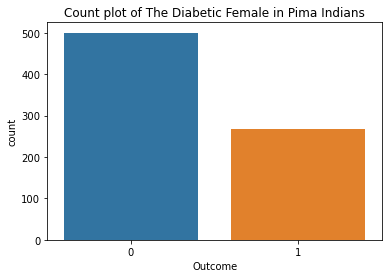

In [800]:
## creating count plot with title using seaborn
sns.countplot(x=df.Outcome)
plt.title("Count plot of The Diabetic Female in Pima Indians")

In [801]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [802]:
df[['Glucose ','BloodPressure','SkinThickness','Insulin ','BMI']] =  df[['Glucose ','BloodPressure','SkinThickness','Insulin ','BMI']].replace(0, np.NaN)
print(df.isnull().sum())

Pregnancies                    0
Glucose                        5
BloodPressure                 35
SkinThickness                227
Insulin                      374
BMI                           11
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [803]:
p=df.isnull().sum() / df.shape[0]
p

Pregnancies                  0.000000
Glucose                      0.006510
BloodPressure                0.045573
SkinThickness                0.295573
Insulin                      0.486979
BMI                          0.014323
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

From the result above we note that these features have more than 05% missing data
-Remove the rows containing the missing values if less than 5% of values are missing in a column, the column Bloodpressure and BMI has less than 5% missing , So we will proceed to delete those missing rows 

In [804]:
df = df.dropna(subset=['BloodPressure'])
df = df.dropna(subset=['BMI'])
df = df.dropna(subset=['Glucose '])

# Using KNN to input the missing data 

In [805]:
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(df)
# transform the dataset
df_filled = imputer.transform(df)
df_filled = pd.DataFrame(df_filled)
#df_filled.info()
df2 = df_filled.rename({0: 'Pregnancies', 1: 'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin', 5:'BMI',6:'DBF',7:'Age',8:'Outcome'}, axis=1)  # new method
#BMI	DiabetesPedigreeFunction	Age	Outcome
df2.head()
# print total missing
df2.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DBF              0
Age              0
Outcome          0
dtype: int64

# Finding outliers in data 

C:\Users\merie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\merie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

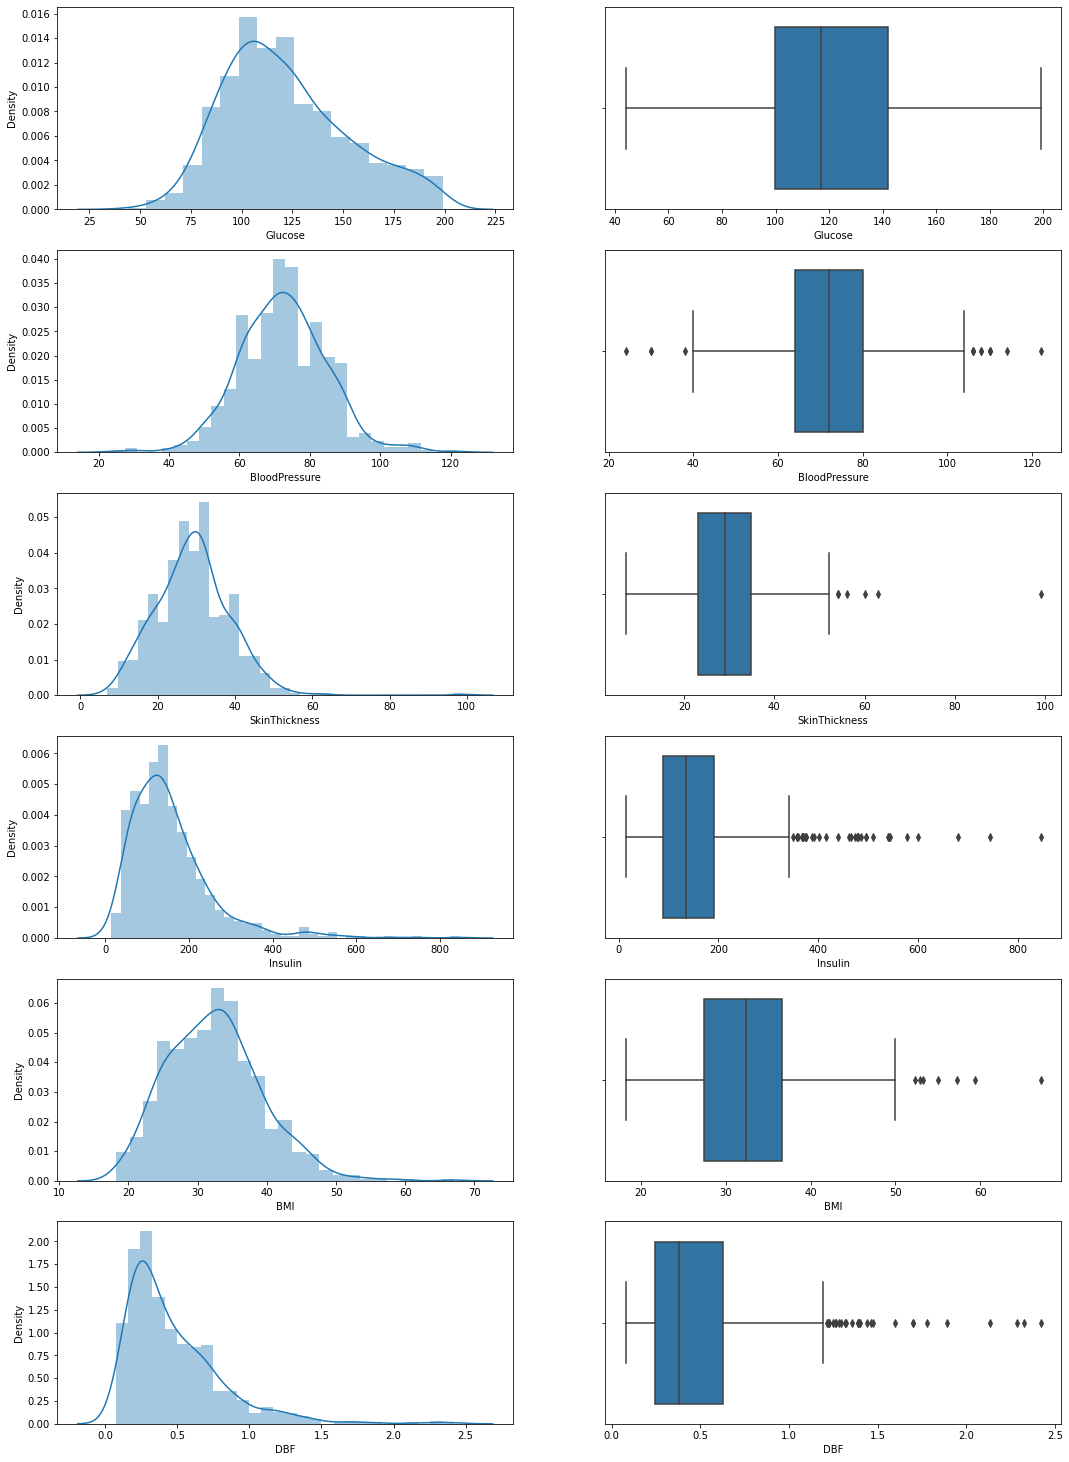

In [806]:
plt.figure(figsize=(18,35))
plt.subplot(8,2,3)
sns.distplot(df2['Glucose'])
plt.subplot(8,2,4)
sns.boxplot(df2['Glucose'])
plt.subplot(8,2,5) #histogram
sns.distplot(df2['BloodPressure'])
plt.subplot(8,2,6)
sns.boxplot(df2['BloodPressure'])
plt.subplot(8,2,7) #histogram
sns.distplot(df2['SkinThickness'])
plt.subplot(8,2,8)
sns.boxplot(df2['SkinThickness'])
plt.subplot(8,2,9) #histogram
sns.distplot(df2['Insulin'])
plt.subplot(8,2,10)
sns.boxplot(df2['Insulin'])
plt.subplot(8,2,11) #histogram
sns.distplot(df2['BMI'])
plt.subplot(8,2,12)
sns.boxplot(df2['BMI'])
plt.subplot(8,2,13) #histogram
sns.distplot(df2['DBF'])
plt.subplot(8,2,14)
sns.boxplot(df2['DBF'])
plt.show()

In [807]:
from collections import Counter
def detect_outliers(df2,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | (df2[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [808]:
df2.loc[detect_outliers(df2,[ 'Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DBF','Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
418,0.0,180.0,78.0,63.0,14.0,59.4,2.42,25.0,1.0


In [809]:
df2 = df2.drop(detect_outliers(df2,[ 'Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DBF']),axis = 0).reset_index(drop = True)

In [810]:
df2.drop(df2.index[df2['Insulin'] > 400.0], inplace = True)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
718,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
719,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
720,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
721,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [811]:
df2.drop(df2.index[df2['DBF'] > 1.0], inplace = True)
#df2

In [812]:
df2.drop(df2.index[df2['SkinThickness'] > 50], inplace = True)
#df2

In [813]:
df2.drop(df2.index[df2['BMI'] > 50], inplace = True)
#df2

In [814]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
count,644.000000,644.00000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,3.900621,119.76087,72.049689,28.339441,141.493478,31.876708,0.407508,33.133540,0.315217
std,3.331279,29.55121,12.166318,8.612862,73.210924,6.345578,0.219611,11.749228,0.464964
min,0.000000,44.00000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.00000,64.000000,22.700000,87.450000,27.300000,0.237750,24.000000,0.000000
50%,3.000000,114.00000,72.000000,29.000000,130.000000,32.000000,0.346000,29.000000,0.000000
75%,6.000000,138.00000,80.000000,33.450000,181.850000,35.800000,0.557000,40.250000,1.000000
max,17.000000,198.00000,122.000000,50.000000,392.000000,50.000000,0.997000,81.000000,1.000000


# Relevant Feature

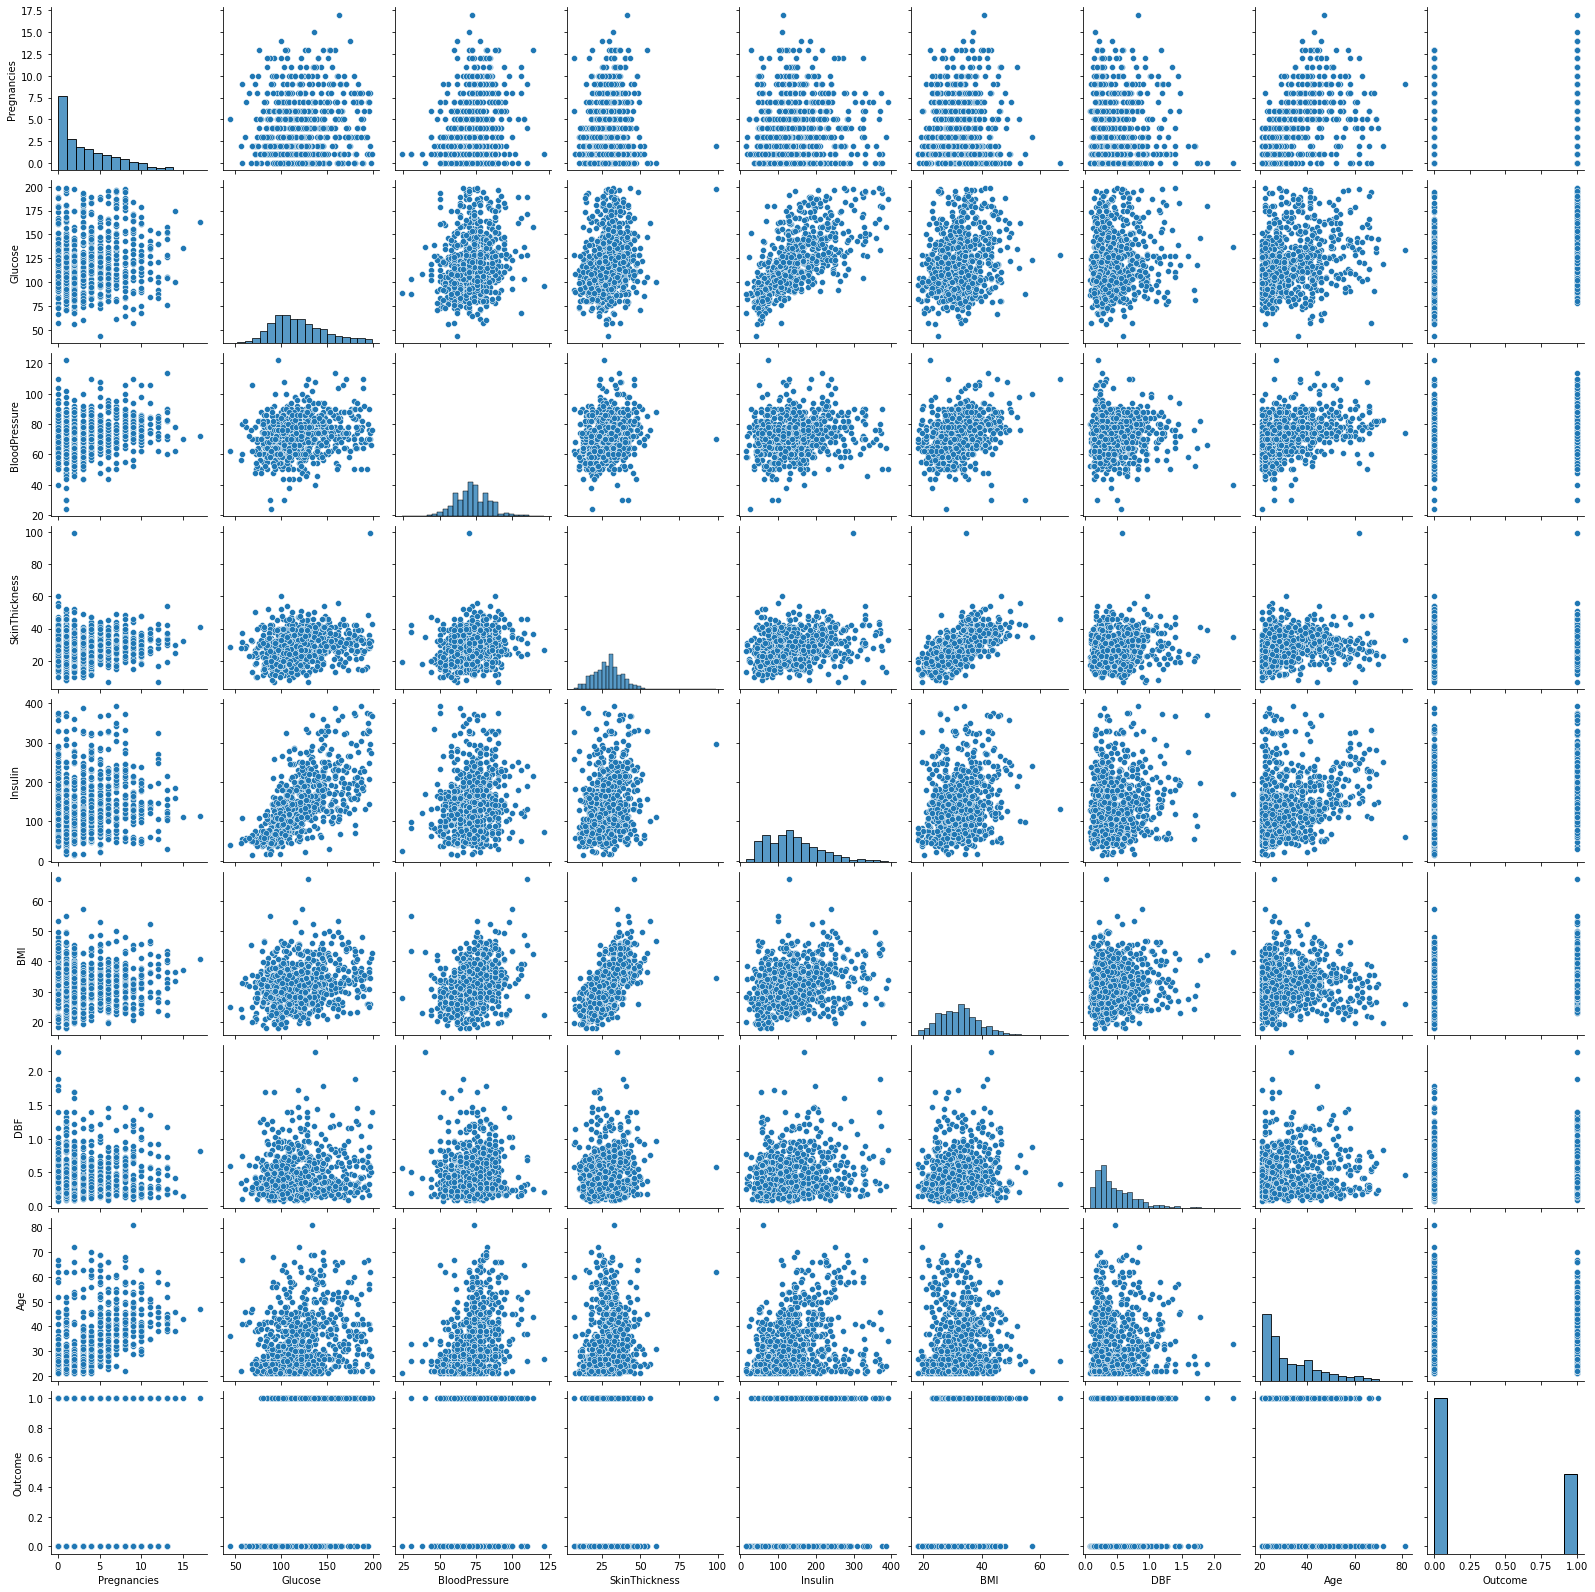

In [742]:
seaborn.pairplot(df2)
plt.show()

# Correlation 

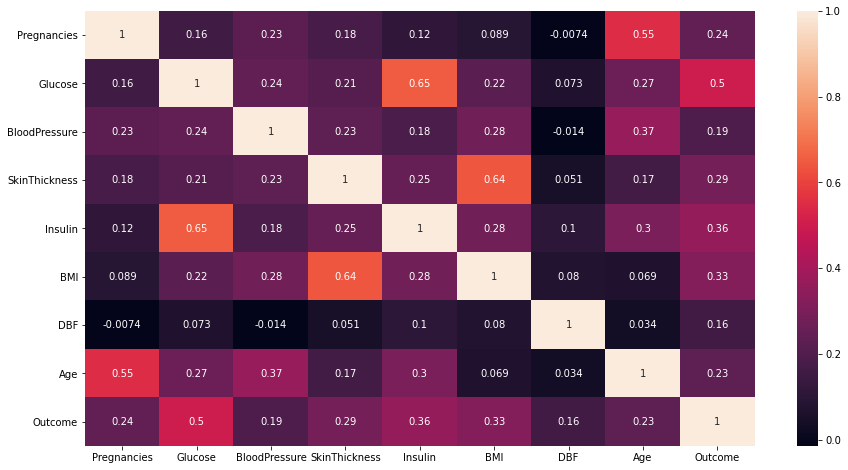

In [784]:
fig = plt.figure(figsize=(15, 8))
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

# Descrption of the Dataset after Preprocessing

In [816]:
X.describe()

,Glucose,Pregnancies,Age,Insulin,BMI,SkinThickness
count,644.00000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,119.76087,3.900621,33.133540,141.493478,31.876708,28.339441
std,29.55121,3.331279,11.749228,73.210924,6.345578,8.612862
min,44.00000,0.000000,21.000000,15.000000,18.200000,7.000000
25%,99.00000,1.000000,24.000000,87.450000,27.300000,22.700000
50%,114.00000,3.000000,29.000000,130.000000,32.000000,29.000000
75%,138.00000,6.000000,40.250000,181.850000,35.800000,33.450000
max,198.00000,17.000000,81.000000,392.000000,50.000000,50.000000


# Split of the data

In [ ]:
X = df2[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI','SkinThickness']]
y = df2['Outcome']

In [788]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) 

# Model on unbalanced dataset without any scaling 

# Logistique regression on unbalanced dataset without any scaling

In [789]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [790]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[88, 10],
       [16, 24]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

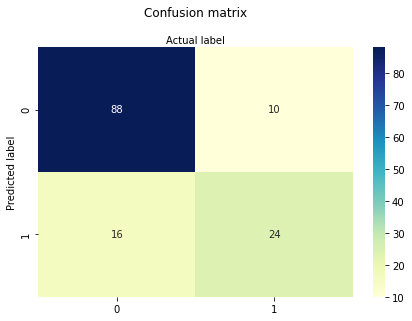

In [791]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [792]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8115942028985508
Precision: 0.7058823529411765
Recall: 0.6


In [756]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [757]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[74, 20],
       [21, 35]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

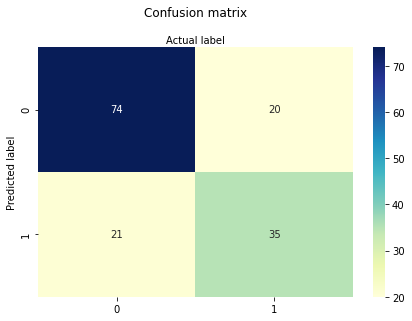

In [758]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [760]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7266666666666667
Precision: 0.6363636363636364
Recall: 0.625


# SVM on unbalanced dataset without any scaling

In [465]:
from sklearn.svm import SVC
SVM1 = SVC(random_state=0, kernel='rbf')
SVM1.fit(X_train, y_train)

SVC(random_state=0)

In [466]:
# fit the model with data
SVM1.fit(X_train,y_train)
y_pred1=SVM1.predict(X_test)

In [608]:
cm1 = confusion_matrix(y_test, y_pred1)
print (cm1)

[[80  4]
 [21 24]]


Text(33.0, 0.5, 'Predicted label')

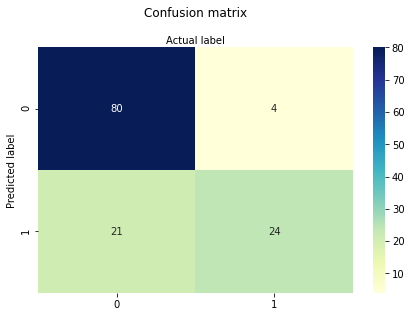

In [609]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [469]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.8062015503875969
Precision: 0.8571428571428571
Recall: 0.5333333333333333


# Decision tree on unbalanced dataset without any scaling

In [471]:
DecisionTree2 = DecisionTreeClassifier(random_state=0)
DecisionTree2.fit(X_train, y_train)
y_pred2 = DecisionTree2.predict(X_test)

In [472]:
cm2 = confusion_matrix(y_test, y_pred2)
print (cm2)

[[67 17]
 [18 27]]


Text(33.0, 0.5, 'Predicted label')

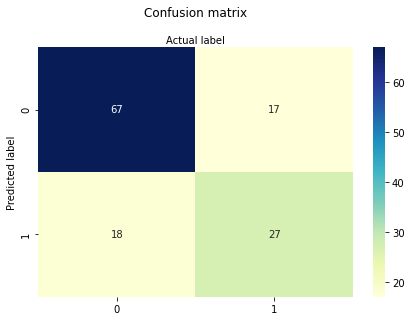

In [473]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [474]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.7286821705426356
Precision: 0.6136363636363636
Recall: 0.6


# Random Forest on unbalanced dataset without any scaling

In [476]:
#Create a Gaussian Classifier
RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RForest3.fit(X_train,y_train)

y_pred3=RForest3.predict(X_test)

In [477]:
cm3 = confusion_matrix(y_test, y_pred3)
print (cm3)

[[73 11]
 [15 30]]


Text(33.0, 0.5, 'Predicted label')

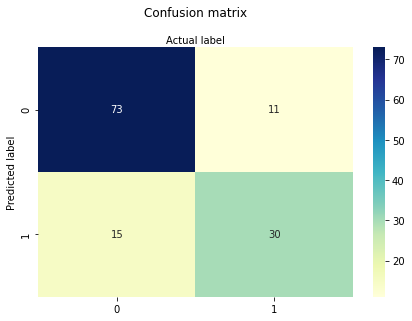

In [478]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [479]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))

Accuracy: 0.7984496124031008
Precision: 0.7317073170731707
Recall: 0.6666666666666666


# Scaling the data on unbalanced Dataset 

In [481]:
X = df2[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI','BloodPressure','SkinThickness']]
y = df2['Outcome']

In [482]:
Scaler=StandardScaler()
Scaler.fit(X)

StandardScaler()

In [483]:
X= Scaler.transform(X)
X

array([[ 0.95634261,  0.63069197,  1.4366536 , ...,  0.27178476,
        -0.00408736,  0.77392811],
       [-1.17720695, -0.87139985, -0.18173099, ..., -0.83220308,
        -0.4976355 ,  0.0767541 ],
       [ 2.14164792,  1.23152869, -0.09655286, ..., -1.35265449,
        -0.66215155, -0.29507205],
       ...,
       [ 0.04196423,  0.3302736 , -0.26690913, ..., -0.8952881 ,
        -0.00408736, -0.62041992],
       [ 0.21129356, -0.87139985,  1.18111919, ..., -0.28020916,
        -0.99118365,  0.79716725],
       [-0.90628002, -0.87139985, -0.86315608, ..., -0.23289539,
        -0.1686034 ,  0.30914544]])

In [484]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) 

# Logisitique regression on unbalanced dataset  with scaling data

In [486]:
# instantiate the model (using the default parameters)
logreg4 = LogisticRegression()
# fit the model with data
logreg4.fit(X_train,y_train)
y_pred4=logreg4.predict(X_test)

In [487]:
cm4 = confusion_matrix(y_test, y_pred4)
print (cm4)

[[79  5]
 [17 28]]


Text(33.0, 0.5, 'Predicted label')

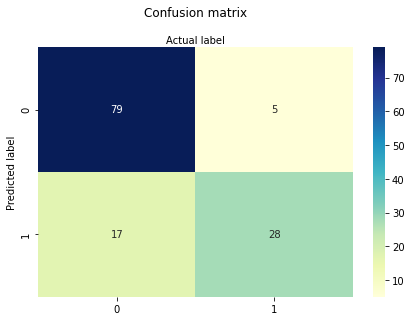

In [489]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [490]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))

Accuracy: 0.8294573643410853
Precision: 0.8484848484848485
Recall: 0.6222222222222222


# SVM  on unbalanced dataset  with scaling data

In [492]:
SVM5 = SVC(random_state=0, kernel='rbf')
SVM5.fit(X_train, y_train)
y_pred5=SVM5.predict(X_test)

In [493]:
cm5 = confusion_matrix(y_test, y_pred5)
print (cm5)

[[77  7]
 [18 27]]


Text(0.5, 257.44, 'Predicted label')

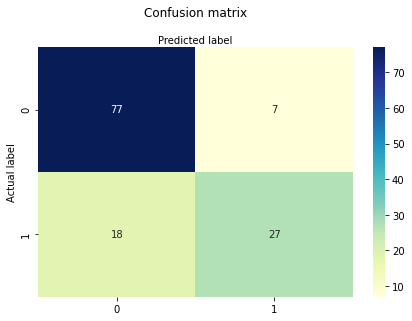

In [494]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [495]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("Precision:",metrics.precision_score(y_test, y_pred5))
print("Recall:",metrics.recall_score(y_test, y_pred5))

Accuracy: 0.8062015503875969
Precision: 0.7941176470588235
Recall: 0.6


# Decision Tree   on unbalanced dataset  with scaling data

In [497]:
DecisionTree6 = DecisionTreeClassifier(random_state=0)
DecisionTree6.fit(X_train, y_train)
y_pred6=DecisionTree6.predict(X_test)

In [498]:
cm6 = confusion_matrix(y_test, y_pred6)
print (cm6)

[[67 17]
 [17 28]]


Text(0.5, 257.44, 'Predicted label')

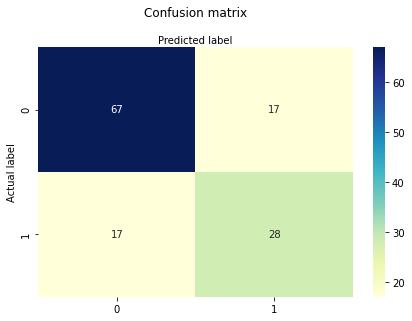

In [499]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm6), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [500]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))
print("Precision:",metrics.precision_score(y_test, y_pred6))
print("Recall:",metrics.recall_score(y_test, y_pred6))

Accuracy: 0.7364341085271318
Precision: 0.6222222222222222
Recall: 0.6222222222222222


# Random Forest on unbalanced dataset  with scaling data

In [503]:
RForest7=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest7.fit(X_train,y_train)
y_pred7=RForest7.predict(X_test)

In [504]:
cm7 = confusion_matrix(y_test, y_pred7)
print (cm7)

[[76  8]
 [16 29]]


Text(0.5, 257.44, 'Predicted label')

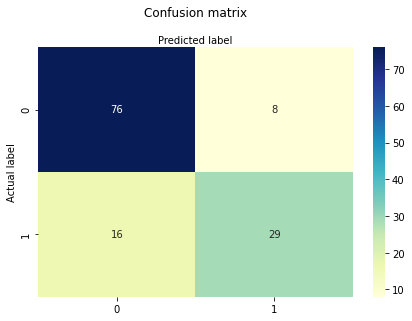

In [505]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm7), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [506]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))
print("Precision:",metrics.precision_score(y_test, y_pred7))
print("Recall:",metrics.recall_score(y_test, y_pred7))

Accuracy: 0.813953488372093
Precision: 0.7837837837837838
Recall: 0.6444444444444445


# Balancing the dataset with the undersampling technique

In [572]:
# class count
class_count_0, class_count_1 = df2['Outcome'].value_counts()
# Separate class
class_0 = df2[df2['Outcome'] == 0]
class_1 = df2[df2['Outcome'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (441, 9)
class 1: (203, 9)


total class of 1 and0: 0.0    203
1.0    203
Name: Outcome, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

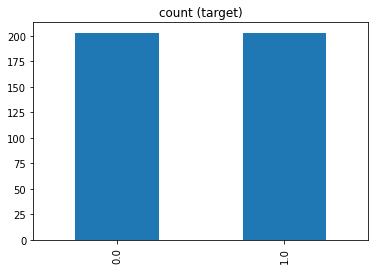

In [573]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and0:",test_under['Outcome'].value_counts())# plot the count after under-sampeling
test_under['Outcome'].value_counts().plot(kind='bar', title='count (target)')

# Models on balanced  Dataset with unscaled data 

In [574]:
X_under = test_under[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI','BloodPressure','SkinThickness']]
y_under = test_under['Outcome']

In [575]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2,random_state=0) 

# Logistique regression on balanced  Dataset with unscaled data 

In [512]:
# instantiate the model (using the default parameters)
logreg8 = LogisticRegression()
# fit the model with data
logreg8.fit(X_train,y_train)
#
y_pred8=logreg8.predict(X_test)

In [513]:
cm8 = confusion_matrix(y_test, y_pred8)
print (cm8)

[[33 11]
 [11 27]]


Text(33.0, 0.5, 'Predicted label')

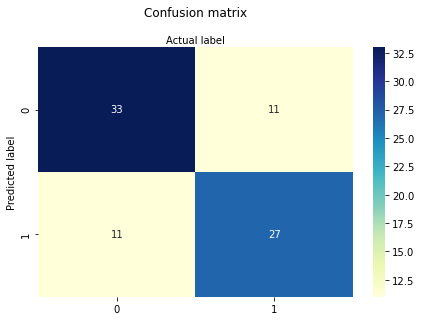

In [519]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm8), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [520]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))
print("Precision:",metrics.precision_score(y_test, y_pred8))
print("Recall:",metrics.recall_score(y_test, y_pred8))

Accuracy: 0.7317073170731707
Precision: 0.7105263157894737
Recall: 0.7105263157894737


# SVM on balanced  Dataset with unscaled data 

In [522]:
SVM9 = SVC(random_state=0, kernel='rbf')
SVM9.fit(X_train, y_train)
y_pred9=SVM9.predict(X_test)

In [523]:
cm9 = confusion_matrix(y_test, y_pred9)
print (cm9)

[[33 11]
 [14 24]]


Text(33.0, 0.5, 'Predicted label')

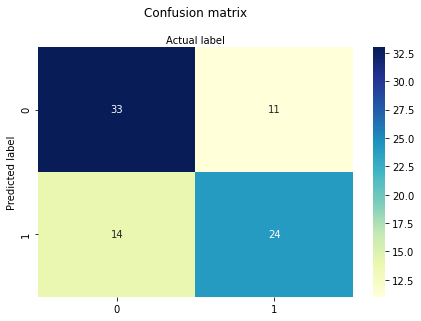

In [524]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm9), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [525]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred9))
print("Precision:",metrics.precision_score(y_test, y_pred9))
print("Recall:",metrics.recall_score(y_test, y_pred9))

Accuracy: 0.6951219512195121
Precision: 0.6857142857142857
Recall: 0.631578947368421


# Decision tree on balanced  Dataset with unscaled data 

In [527]:
DTree10 = DecisionTreeClassifier(random_state=0)
DTree10.fit(X_train, y_train)
y_pred10 = DTree10.predict(X_test)

In [528]:
cm10 = confusion_matrix(y_test, y_pred10)
print (cm10)

[[35  9]
 [13 25]]


Text(33.0, 0.5, 'Predicted label')

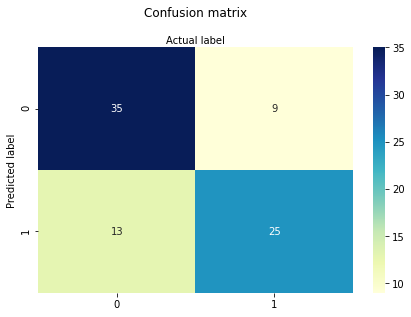

In [529]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm10), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [530]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred10))
print("Precision:",metrics.precision_score(y_test, y_pred10))
print("Recall:",metrics.recall_score(y_test, y_pred10))

Accuracy: 0.7317073170731707
Precision: 0.7352941176470589
Recall: 0.6578947368421053


# Random Forest on balanced  Dataset with unscaled data 

In [532]:
#Create a Gaussian Classifier
RForest11=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest11.fit(X_train,y_train)
y_pred11=RForest11.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

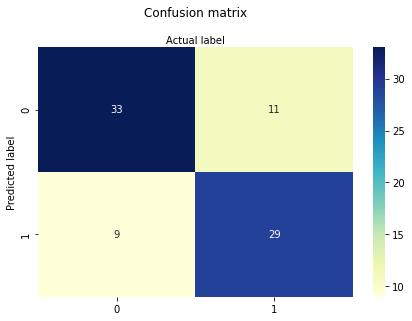

In [533]:
cm11 = metrics.confusion_matrix(y_test, y_pred11)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm11), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [534]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred11))
print("Precision:",metrics.precision_score(y_test, y_pred11))
print("Recall:",metrics.recall_score(y_test, y_pred11))

Accuracy: 0.7560975609756098
Precision: 0.725
Recall: 0.7631578947368421


# Undersampling on scaled data 

In [576]:
X_under = test_under[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI','BloodPressure','SkinThickness']]
y_under = test_under['Outcome']

In [577]:
Scaler=StandardScaler()
Scaler.fit(X_under)

StandardScaler()

In [578]:
X_under= Scaler.transform(X_under)

In [579]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2,random_state=0) 

# Models on balanced  Dataset with scaled data 

# Logistique regression on balanced  Dataset with scaled data 

In [580]:
logreg12 = LogisticRegression()
# fit the model with data
logreg12.fit(X_train,y_train)
#
y_pred12=logreg12.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

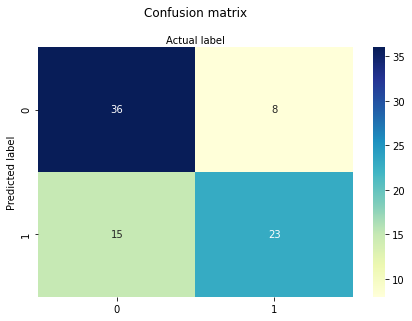

In [581]:
cm12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm12), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [582]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.7195121951219512
Precision: 0.7419354838709677
Recall: 0.6052631578947368


# SVM , on balanced  Dataset with scaled data 

In [584]:
SVM13 = SVC(random_state=0, kernel='rbf')
SVM13.fit(X_train, y_train)
y_pred13=SVM13.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

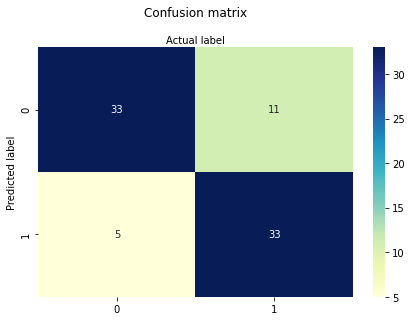

In [585]:
cm13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm13), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [586]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))

Accuracy: 0.8048780487804879
Precision: 0.75
Recall: 0.868421052631579


# Decision tree on balanced  Dataset with scaled data 

In [588]:
DTree14 = DecisionTreeClassifier(random_state=0)
DTree14.fit(X_train, y_train)
y_pred14 = DTree14.predict(X_test)

Text(33.0, 0.5, 'Predicted label')

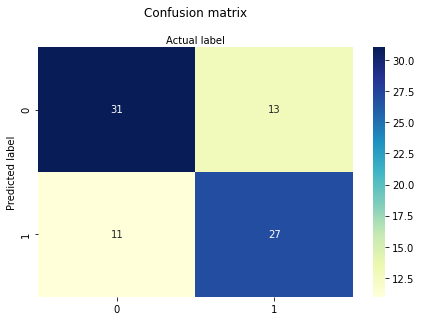

In [589]:
cm14 = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm14), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [590]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))

Accuracy: 0.7073170731707317
Precision: 0.675
Recall: 0.7105263157894737


# Random Forest on balanced  Dataset with scaled data 

In [592]:
#Create a Gaussian Classifier
RForest15=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
RForest15.fit(X_train,y_train)
RForest15=RForest15.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

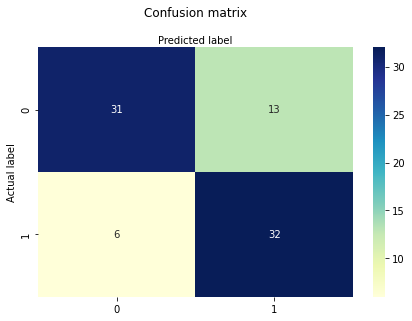

In [593]:
CM15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM15), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [594]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))

Accuracy: 0.7682926829268293
Precision: 0.7111111111111111
Recall: 0.8421052631578947
